# Machine Learning Capstone Project
## Car Price Prediction

#### Problem Statement:

Predict the price of a car based on various parameters like car make, car model, car year engine cylinder, driven wheels, market category etc. The company wants to know —


- which variables are significant in predicting the price of a car
- how well those variables describe the price of a car

**So interpretation is important!**

## Step 1: Reading and Understanding the Data

Let us first import NumPy, Pandas, matplotlib and seaborn and read the car dataset

In [0]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [0]:
# Importing carprice.csv
car_price_df = pd.read_csv('data/data.csv')

In [0]:
# Getting categorical variable and splitting the and choosing only one of them to reduce the number of columns after converting them to numerical
car_price_df['Market Category'] = car_price_df['Market Category'].str.split(',', expand = True)[0]
car_price_df['Engine Fuel Type'] = car_price_df['Engine Fuel Type'].str.split(' ', expand = True)[0]
car_price_df['Driven_Wheels'] = car_price_df['Driven_Wheels'].str.split(' ', expand = True)[0]
car_price_df['Vehicle Style'] = car_price_df['Vehicle Style'].str.split(' ', expand = True)[0]
# Model is not giving any value addition to prediction so dropping it
car_price_df.drop('Model', inplace=True,axis=1)

In [0]:
# Check the head of the dataset
car_price_df.head()

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,2011,premium,335.0,6.0,MANUAL,rear,2.0,Factory Tuner,Compact,Coupe,26,19,3916,46135
1,BMW,2011,premium,300.0,6.0,MANUAL,rear,2.0,Luxury,Compact,Convertible,28,19,3916,40650
2,BMW,2011,premium,300.0,6.0,MANUAL,rear,2.0,Luxury,Compact,Coupe,28,20,3916,36350
3,BMW,2011,premium,230.0,6.0,MANUAL,rear,2.0,Luxury,Compact,Coupe,28,18,3916,29450
4,BMW,2011,premium,230.0,6.0,MANUAL,rear,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [0]:
# checking shape of the dataframe
car_price_df.shape

(11914, 15)

In [0]:
# checking values for null
car_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 15 columns):
Make                 11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11911 non-null object
Engine HP            11845 non-null float64
Engine Cylinders     11884 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11908 non-null float64
Market Category      8172 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


In [0]:
# removing all the rows from DF which has null values
CarPriceCleanDf=car_price_df.dropna()

In [0]:
# checking null values after removing them
CarPriceCleanDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8084 entries, 0 to 11913
Data columns (total 15 columns):
Make                 8084 non-null object
Year                 8084 non-null int64
Engine Fuel Type     8084 non-null object
Engine HP            8084 non-null float64
Engine Cylinders     8084 non-null float64
Transmission Type    8084 non-null object
Driven_Wheels        8084 non-null object
Number of Doors      8084 non-null float64
Market Category      8084 non-null object
Vehicle Size         8084 non-null object
Vehicle Style        8084 non-null object
highway MPG          8084 non-null int64
city mpg             8084 non-null int64
Popularity           8084 non-null int64
MSRP                 8084 non-null int64
dtypes: float64(3), int64(5), object(7)
memory usage: 1010.5+ KB


In [0]:
# getting all the important details/information of dataset
CarPriceCleanDf.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8.084000e+03
mean,2012.058634,274.642751,5.778080,3.414151,26.650915,19.553686,1499.397823,5.007267e+04
std,6.317981,115.003475,1.886088,0.898087,7.720473,7.159964,1413.855615,7.029313e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2010.000000,192.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.591875e+04
50%,2015.000000,264.000000,6.000000,4.000000,26.000000,18.000000,1013.000000,3.500500e+04
75%,2016.000000,320.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.872250e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

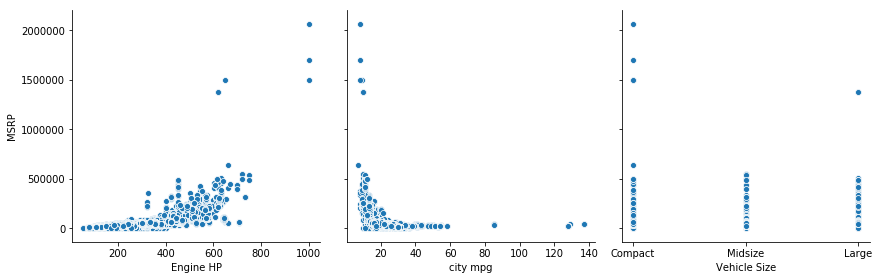

In [0]:
# Pair plot to check which feature has strongest relationship with 'MSRP' to get the benchmark model i.e. Simple Linear Regression model
sns.pairplot(CarPriceCleanDf, x_vars=['Engine HP', 'city mpg', 'Vehicle Size'], y_vars='MSRP',size=4, aspect=1, kind='scatter')
plt.show()

As it shows Engine HP has the good linear relation ship

#### Visualising data with Heatmap

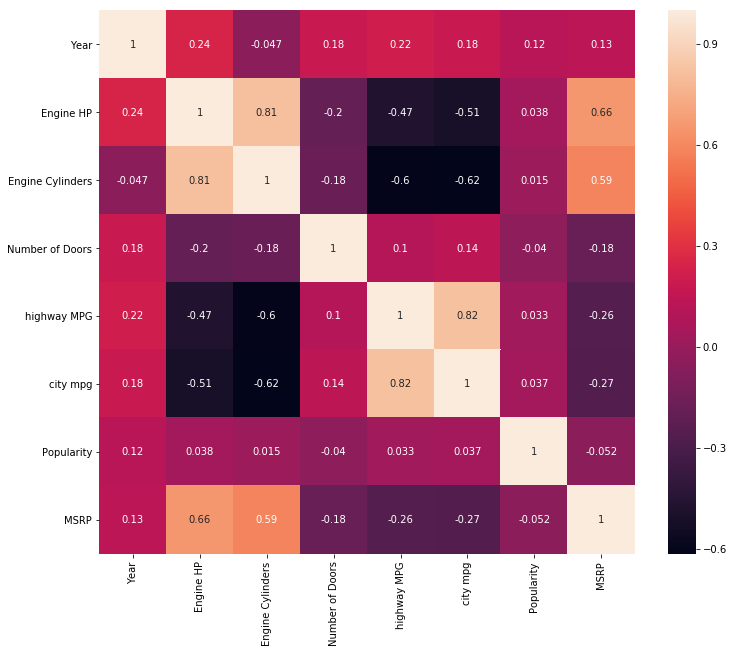

In [0]:
fig = plt.figure(figsize=(12,10))
sns.heatmap(CarPriceCleanDf.corr(),annot=True)

As is visible from the pairplot and the heatmap, the variable `Engine Cylinders` seems to be most correlated with `Engine HP`, the variable `City mpg` seems to be most correlated with `highway mpg`. 

## Step 3: Data Preparation
- You can see that your dataset has many columns has categorical values in String, like Vehicle style: Coupe / Convertible.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s

In [0]:
# converting all categorical variables to numeric variables

# Let's drop the first column from status df using 'drop_first = True'
carmake = pd.get_dummies(CarPriceCleanDf['Make'], drop_first = True)

carenginefueltype = pd.get_dummies(CarPriceCleanDf['Engine Fuel Type'], drop_first = True)

cartransmissiontype = pd.get_dummies(CarPriceCleanDf['Transmission Type'], drop_first = True)

cardrivenwheels = pd.get_dummies(CarPriceCleanDf['Driven_Wheels'], drop_first = True)

carmarketcategory =  pd.get_dummies(CarPriceCleanDf['Market Category'], drop_first = True)

carvehiclesize = pd.get_dummies(CarPriceCleanDf['Vehicle Size'], drop_first = True)

carvehiclestyle = pd.get_dummies(CarPriceCleanDf['Vehicle Style'], drop_first = True)

# Add the results to the original housing dataframe
CarPriceCleanDf = pd.concat([CarPriceCleanDf,carmake, carenginefueltype,cartransmissiontype,cardrivenwheels,
                             carmarketcategory,carvehiclesize,carvehiclestyle], axis = 1)

# Drop all categorical variable original columns
CarPriceCleanDf.drop(['Make','Engine Fuel Type','Transmission Type','Driven_Wheels', 'Market Category','Vehicle Size','Vehicle Style',], axis = 1, inplace = True)

# Now let's see the head of our dataframe.
CarPriceCleanDf.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Alfa Romeo,Aston Martin,...,4dr,Cargo,Convertible,Coupe,Crew,Extended,Passenger,Regular,Sedan,Wagon
0,2011,335.0,6.0,2.0,26,19,3916,46135,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2011,300.0,6.0,2.0,28,19,3916,40650,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2011,300.0,6.0,2.0,28,20,3916,36350,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2011,230.0,6.0,2.0,28,18,3916,29450,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2011,230.0,6.0,2.0,28,18,3916,34500,0,0,...,0,0,1,0,0,0,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [0]:
# import train_test_split
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

# splitting train and test dataset for model
df_train, df_test = train_test_split(CarPriceCleanDf, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `Popularity`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [0]:
# import MinMaxScaler to scale all umerical features(other than 1 and 0)
from sklearn.preprocessing import MinMaxScaler

In [0]:
# creating object of MinMaxScaler
scaler = MinMaxScaler()

In [0]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg','Popularity','MSRP']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Alfa Romeo,Aston Martin,...,4dr,Cargo,Convertible,Coupe,Crew,Extended,Passenger,Regular,Sedan,Wagon
285,2008,0.265328,0.375,0.0,0.035088,0.069767,0.354907,0.014153,0,0,...,0,0,0,1,0,0,0,0,0,0
6359,1993,0.084567,0.250,0.0,0.040936,0.085271,0.094253,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
11494,2016,0.258985,0.375,1.0,0.043860,0.085271,0.692131,0.021706,0,0,...,1,0,0,0,0,0,0,0,0,0
10318,2016,0.131078,0.250,0.0,0.055556,0.116279,0.018214,0.008981,0,0,...,0,0,0,0,0,0,0,0,0,0
6574,2014,0.366808,0.500,1.0,0.020468,0.046512,0.108753,0.027836,0,0,...,1,0,0,0,0,0,0,0,0,0


In [0]:
# creating X and y from training dataset

y_train = df_train.pop('MSRP')
X_train = df_train

In [0]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [0]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [0]:
# Getiing the rank of features and support value

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', False, 68),
 ('Engine HP', True, 1),
 ('Engine Cylinders', False, 14),
 ('Number of Doors', False, 7),
 ('highway MPG', False, 62),
 ('city mpg', True, 1),
 ('Popularity', False, 20),
 ('Alfa Romeo', False, 4),
 ('Aston Martin', False, 3),
 ('Audi', False, 45),
 ('BMW', False, 31),
 ('Bentley', True, 1),
 ('Bugatti', True, 1),
 ('Buick', False, 43),
 ('Cadillac', False, 46),
 ('Chevrolet', False, 26),
 ('Chrysler', False, 30),
 ('Dodge', False, 15),
 ('FIAT', False, 56),
 ('Ferrari', True, 1),
 ('Ford', False, 19),
 ('GMC', False, 49),
 ('Genesis', False, 50),
 ('HUMMER', False, 32),
 ('Honda', False, 25),
 ('Hyundai', False, 27),
 ('Infiniti', False, 52),
 ('Kia', False, 24),
 ('Lamborghini', True, 1),
 ('Land Rover', False, 12),
 ('Lexus', False, 29),
 ('Lincoln', False, 42),
 ('Lotus', True, 1),
 ('Maserati', True, 1),
 ('Maybach', True, 1),
 ('Mazda', False, 58),
 ('McLaren', False, 2),
 ('Mercedes-Benz', False, 18),
 ('Mitsubishi', False, 57),
 ('Nissan', False, 22),
 ('

In [0]:
# select the feature with 'True' support value
col = X_train.columns[rfe.support_]
col

Index(['Engine HP', 'city mpg', 'Bentley', 'Bugatti', 'Ferrari', 'Lamborghini',
       'Lotus', 'Maserati', 'Maybach', 'Porsche', 'Rolls-Royce', 'Spyker',
       'electric', 'UNKNOWN', 'Exotic'],
      dtype='object')

In [0]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [0]:
# Adding a constant variable to get intercept
import statsmodels.api as sm  
X_train_rfe_lm = sm.add_constant(X_train_rfe)

In [0]:
# fitting the model
lm = sm.OLS(y_train,X_train_rfe_lm).fit()  

In [0]:
#Let's see the summary of our linear model with multiple features
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSRP   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     1653.
Date:                Mon, 25 Mar 2019   Prob (F-statistic):               0.00
Time:                        18:59:30   Log-Likelihood:                 16010.
No. Observations:                5658   AIC:                        -3.199e+04
Df Residuals:                    5642   BIC:                        -3.188e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0116      0.001    -13.439      

The R-squared value obtained is `0.815`

#### Removing field `Unknown` as it is having P-value non zero(i.e. 0.039)

In [0]:
# Dropping the 'UNKNOWN' column from selected features
X_train_new1 = X_train_rfe.drop(["UNKNOWN"], axis = 1)

In [0]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm1 = sm.add_constant(X_train_new1)

# creating new model after removing 'UNKNOWN' column
lm = sm.OLS(y_train,X_train_lm1).fit()   

#Let's see the summary of new linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSRP   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     1769.
Date:                Mon, 25 Mar 2019   Prob (F-statistic):               0.00
Time:                        18:59:30   Log-Likelihood:                 16008.
No. Observations:                5658   AIC:                        -3.199e+04
Df Residuals:                    5643   BIC:                        -3.189e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0116      0.001    -13.466      

The R-squared value obtained is `0.814`

#### Removing field `Spyker` as it is having non zero P-value(i.e. 0.017)

In [0]:
# Dropping Spyker from the selected features
X_train_new2 = X_train_new1.drop(["Spyker"], axis = 1)

In [0]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm2 = sm.add_constant(X_train_new2)
lm = sm.OLS(y_train,X_train_lm2).fit()   

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSRP   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     1904.
Date:                Mon, 25 Mar 2019   Prob (F-statistic):               0.00
Time:                        18:59:30   Log-Likelihood:                 16005.
No. Observations:                5658   AIC:                        -3.198e+04
Df Residuals:                    5644   BIC:                        -3.189e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0116      0.001    -13.410      

- The Adjusted R-squared value obtained is `0.814`.
- P-Value for all features are zero.
- AIC and BIC are lowest values.

Above three results are expected to be a good model. Now we will check for multicollinearity using VIF.


### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [0]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new2.columns
vif['VIF'] = [variance_inflation_factor(X_train_new2.values, i) for i in range(X_train_new2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Exotic,3.34
0,Engine HP,2.57
1,city mpg,2.23
2,Bentley,1.42
4,Ferrari,1.37
7,Maserati,1.37
5,Lamborghini,1.33
6,Lotus,1.20
11,electric,1.19
10,Rolls-Royce,1.17


We generally want a VIF that is less than 5.

Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [0]:
# fitting model to predict the Y-values of training dataset
y_train_price = lm.predict(X_train_lm2)

Text(0.5, 0, 'Errors')

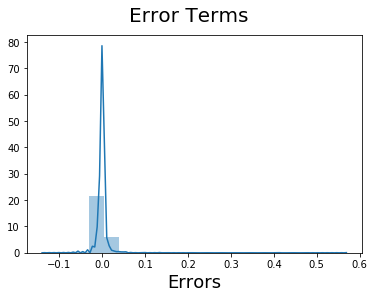

In [0]:
# Error term should be normally distributed along mean zero for a stable model

fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

Since Error term is normally distributed along mean zero hence it is a stable model.

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

#### Applying the scaling on the test sets

In [0]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into x_test and y_test

In [0]:
y_test = df_test.pop('MSRP')
X_test = df_test

In [0]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new2 = X_test[X_train_new2.columns]

# Adding a constant variable 
X_test_new_lm2 = sm.add_constant(X_test_new2)

In [0]:
# Making predictions
y_pred = lm.predict(X_test_new_lm2)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

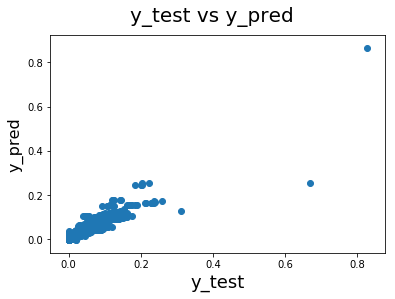

In [0]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

Since there is no pattern found in the error of Y-pred and Y_test and it is scattered randomly so it is giving good prediction value.

We can see that the equation of our best fitted line is:
   $ y = -0.0116 + (Engine HP * 0.1070) + (city mpg * 0.0614) + (Bentley * 0.0187) + (Bugatti * 0.7180) + (Ferrari * 0.0221) + (Lamborghini * 0.0538) + (Lotus * -0.0354) + (Maserati * -0.0255) + (Maybach * 0.1536) + (Porsche * 0.0158) + (Rolls-Royce * 0.0797) + (electric * -0.0395) + (Exotic * 0.0495) $

In [0]:
# import mean squared error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [0]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.014339753815373793

In [0]:
# getting R-squared value
r_squared = r2_score(y_test, y_pred)
r_squared

0.8413970142463679

## BenchMark Model (Simple Linear Regression) using 'Engine HP' as feature variable

In [0]:
# creating X and y from training dataset
X = CarPriceCleanDf['Engine HP']
y = CarPriceCleanDf['MSRP']

In [0]:
# import train_test_split
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

# splitting train and test dataset for model

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [0]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# get the model summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSRP   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     4287.
Date:                Mon, 25 Mar 2019   Prob (F-statistic):               0.00
Time:                        18:59:31   Log-Likelihood:                -69429.
No. Observations:                5658   AIC:                         1.389e+05
Df Residuals:                    5656   BIC:                         1.389e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.833e+04   1778.396    -32.797      0.0

For Simple Linear Refression model. here are the out comes.

- R-Squared value is  0.43, which is not good enough to make predictions.
- AIC and BIC are higher value(positive).
- Constant value is very large in negative value.

Hence SLR is not as good as MLR.

In [0]:
# fitting model to predict the training value and get the residual

y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

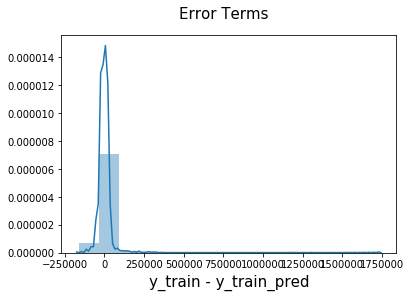

In [0]:
# Error term should be normally distributed along mean zero for a stable model

fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

Since Error Term is not Normally distributed along mean zero hence it is not a good model.

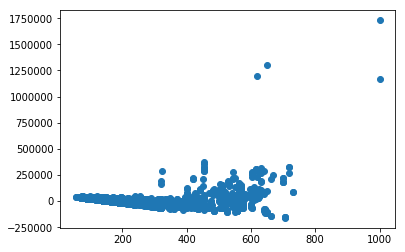

In [0]:
# Drawing scatter plot of residuals

plt.scatter(X_train,res)
plt.show()

As we can see, there is a curve like pattern in the residuals scatter plot, hence we can improve it by adding more features as we have done in multiple linear regression.

In [0]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [0]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

56118.556554044655

As MSE error is very large, it is giving more errors while predictions.

In [0]:
# get R-squared value
r_squared = r2_score(y_test, y_pred)
r_squared

0.4297532643739679

### Conclusion
R-squared value for
    - Multiple Linear Regression: `0.814`
    - Linear Regression: `0.429`

Overall we have a decent model, but we also acknowledge that we could do better. 

We have below option to get more accurate:
1. Build a non-linear model